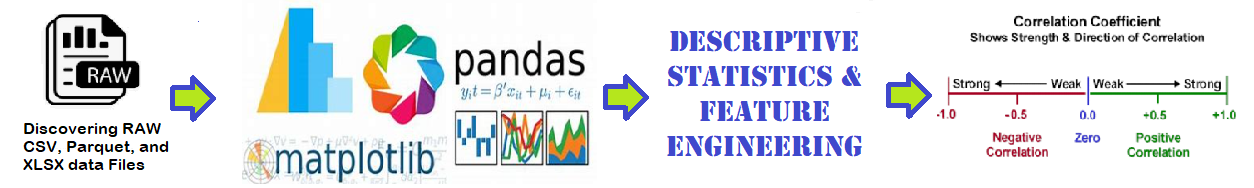

## Generate JSON
#### by Joe Eberle started on 06_19_2023

In [1]:
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns
# Import all of the libraries you need  !pip install pandas_profiling
import ydata_profiling # provides descriptive statistics in html for any dataframe
import display_descriptive as dd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import talking_code as tc 

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'aihs_patient_measures'

## Optional Step 0 - Intitiate Quick logging and settings

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(True)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Process.') 

Process aihs_patient_measures Step 0 - Initializing and starting Process.


In [4]:
explaining_teaching = False 
if explaining_teaching:
    
    tc.say('This program gener4ates JSON from excel files. ')


In [11]:
import pandas as pd
import json

# Function to convert Excel tab to JSON
def convert_tab_to_json(file_name, sheet_name):
    # Read the Excel file
    df = pd.read_excel(file_name, sheet_name=sheet_name)

    # Get the column names
    columns = df.columns.tolist()

    # Create a list to store the JSON entries
    entries = []

    # Iterate over the rows of the DataFrame
    for _, row in df.iterrows():
        entry = {}

        # Iterate over the columns
        for col in columns:
            if pd.notnull(row[col]):
                entry[col] = row[col]

        # Append the entry to the list
        entries.append(entry)

    # Create a dictionary for the JSON structure
    json_data = {
        "data": entries
    }

    # Convert dictionary to JSON string
    json_string = json.dumps(json_data, indent=4)

    # Write JSON string to file
    with open(f'{sheet_name}.json', 'w') as json_file:
        json_file.write(json_string)

    print(f'Converted "{sheet_name}" tab to JSON.')

# Assuming the Excel file is named "input.xlsx"

# Get the names of all tabs in the Excel file
input_file = "c:\\working_directory\\excel\\Digital Health Scripts.xlsx"
xls = pd.ExcelFile(input_file)
sheet_names = xls.sheet_names
# print(sheet_names)

# Iterate over each tab and convert it to JSON
for sheet_name in sheet_names:
    convert_tab_to_json(input_file, sheet_name)


Converted "Getting Started" tab to JSON.
Converted "Gaps in Care" tab to JSON.
Converted "Post Discharge Follow Up" tab to JSON.
Converted "Digital Health Coach" tab to JSON.
Converted "Two Week Challenge" tab to JSON.
Converted "BC - Post DC" tab to JSON.


In [10]:
import pandas as pd
import json

# Function to convert Excel tab to JSON
def convert_tab_to_json(filename, sheet_name):
    # Read the Excel file
    df = pd.read_excel(filename, sheet_name=sheet_name)

    # Get the column names
    columns = df.columns.tolist()

    # Create a list to store the JSON entries
    entries = []

    # Iterate over the rows of the DataFrame
    for _, row in df.iterrows():
        entry = {}

        # Iterate over the columns
        for col in columns:
            if pd.notnull(row[col]):
                entry[col] = row[col]

        # Append the entry to the list
        entries.append(entry)

    # Create a dictionary for the JSON structure
    json_data = {
        "data": entries
    }

    # Convert dictionary to JSON string
    json_string = json.dumps(json_data, indent=4)

    # Write JSON string to file
    with open(f'{sheet_name}.json', 'w') as json_file:
        json_file.write(json_string)

    print(f'Converted "{sheet_name}" tab to JSON.')


input_file = "c:\\working_directory\\excel\\Digital Health Script.xlsx"
xls = pd.ExcelFile(input_file)
sheet_names = xls.sheet_names
# Convert the specified tab to JSON

# Iterate over each tab and convert it to JSON
for sheet_name in sheet_names:
    convert_tab_to_json(input_file, sheet_name)



Converted "Getting Started" tab to JSON.
Converted "Getting Started 2" tab to JSON.
Converted "Gaps in Care" tab to JSON.
Converted "Post Discharge Follow Up" tab to JSON.
Converted "Digital Health Coach" tab to JSON.
Converted "Two Week Challenge" tab to JSON.
Converted "BC - Post DC" tab to JSON.


## Step 1 - Load a sample patient measures data set to be deidentified  

In [5]:
ql.pvlog('info',f' Step 1 -Load a sample patient measures data set to be deidentified') 

data_filename = 'C:\\working_directory\\excel\\patient_measures_raw.xlsx'
 
df = pd.read_excel(data_filename)
data_set_name = 'patient_measures'
ql.pvlog('info',f' Step 1b - Loaded data set {data_set_name} that contains {df.shape[0]} rows and {df.shape[1]} columns.') 

 Step 1 -Load a sample patient measures data set to be deidentified
 Step 1b - Loaded data set patient_measures that contains 41316 rows and 17 columns.


In [6]:
df.shape

(41316, 17)

In [7]:
for field in df.columns:
    print(f",'{field}'")

,'Network'
,'Practice'
,'PROVIDER_NAME'
,'PATIENT_NAME'
,'Measure'
,'TOTAL_MEASURE_COUNT'
,'Not_Met'
,'Met'
,'BIRTH_DATE'
,'AGE_YEARS'
,'GENDER'
,'PHONE_NUMBER'
,'MARA_RISK_SCORE'
,'PAYER_NAME'
,'PLAN_NAME'
,'age_group'
,'risk_group'


In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ql.pvlog('info',f'Process {solution_name} Step 2 - Define a function that takes any Data frame and performs PCA ranking process.') 
def perform_pca(dataframe, top_n=None):
    # Get column names
    column_names = dataframe.columns.tolist()

    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(dataframe)

    # Perform PCA
    pca = PCA()
    principal_components = pca.fit_transform(standardized_data)

    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create a DataFrame to store results
    results = pd.DataFrame(
        {'Feature': column_names,
         'Explained Variance Ratio': explained_variance_ratio})

    # Sort the results by the explained variance ratio in descending order
    results.sort_values(by='Explained Variance Ratio', ascending=False, inplace=True)

    # Add PCA Rank column
    results['PCA Rank'] = range(1, len(results) + 1)

    # Limit the number of principal components if specified
    if top_n is not None:
        results = results.head(top_n)

    return results


Process aihs_patient_measures Step 2 - Define a function that takes any Data frame and performs PCA ranking process.


In [9]:
# pca_df = perform_pca(df)
# pca_df.head(30)

ValueError: could not convert string to float: 'General Physician PC'

In [14]:
df.sort_values(by = ['PATIENT_NAME']
              ,axis = 0
              ,ascending = True)

,Network,Practice,PROVIDER_NAME,PATIENT_NAME,Measure,TOTAL_MEASURE_COUNT,Not_Met,Met,BIRTH_DATE,AGE_YEARS,GENDER,PHONE_NUMBER,MARA_RISK_SCORE,PAYER_NAME,PLAN_NAME,age_group,risk_group
0,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Tobacco Use Screening,1,0,1,1994-04-05,28,Female,(716) 598-1496,0.0,SELF PAY,SELF PAY,Adult,NaN
1,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Adult Depression Screening,1,1,0,1994-04-05,28,Female,(716) 598-1496,0.0,SELF PAY,SELF PAY,Adult,NaN
2,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Cervical Cancer Screening,1,0,1,1994-04-05,28,Female,(716) 598-1496,0.0,SELF PAY,SELF PAY,Adult,NaN
3,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Tobacco Use Screening,1,0,1,1974-09-30,48,Male,(716) 879-2000,0.0,SELF PAY,TRADITIONAL,Adult,NaN
4,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Adult Depression Screening,1,1,0,1974-09-30,48,Male,(716) 879-2000,0.0,SELF PAY,TRADITIONAL,Adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41313,General Physician PC,GPPC PCP Depew Transit,Paige Burrell PA,"Zylinski, Darlene J",Tobacco Use Screening,1,0,1,1966-03-25,57,NaN,7166560841,0.0,BCBS,BCBS Pharmacy,Adult,NaN
41314,General Physician PC,GPPC PCP Depew Transit,Paige Burrell PA,"Zylinski, Darlene J",Adult Depression Screening,1,1,0,1966-03-25,57,NaN,7166560841,0.0,BCBS,BCBS Pharmacy,Adult,NaN
41311,General Physician PC,GPPC PCP Depew Transit,Paige Burrell PA,"Zylinski, Darlene J",Colorectal Cancer Screening,1,0,1,1966-03-25,57,NaN,7166560841,0.0,BCBS,BCBS Pharmacy,Adult,NaN
41312,General Physician PC,GPPC PCP Depew Transit,Paige Burrell PA,"Zylinski, Darlene J",Cervical Cancer Screening,1,0,1,1966-03-25,57,NaN,7166560841,0.0,BCBS,BCBS Pharmacy,Adult,NaN


In [23]:
def create_patient_ordinal(patient_index):
    return 'Patient_' + str(patient_index)

developing_and_testing = True 
if developing_and_testing:
    print(create_patient_ordinal(103))

Patient_103


In [18]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' with a column 'patient_name'

# Sort the DataFrame based on the 'patient_name' column
df_sorted = df.sort_values('PATIENT_NAME')

# Create a new column 'patient_index' and initialize it with NaN
df_sorted['patient_index'] = float('nan')

# Initialize the patient name and index variables
prev_patient_name = None
index = 0

# Iterate over the rows of the sorted DataFrame
for i, row in df_sorted.iterrows():
    current_patient_name = row['PATIENT_NAME']
    
    # Check if the patient name has changed
    if current_patient_name != prev_patient_name:
        index += 1  # Increment the index if the patient name has changed
    
    # Assign the index value to the 'patient_index' column
    df_sorted.at[i, 'patient_index'] = index
    
    # Update the previous patient name
    prev_patient_name = current_patient_name

# Reset the index of the DataFrame
df_sorted.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(df_sorted)


                    Network                Practice         PROVIDER_NAME  \
0      General Physician PC  GPPC PCP Depew Transit      Lauren Murray PA   
1      General Physician PC  GPPC PCP Depew Transit      Lauren Murray PA   
2      General Physician PC  GPPC PCP Depew Transit      Lauren Murray PA   
3      General Physician PC  GPPC PCP Depew Transit  Stephanie LaPiana PA   
4      General Physician PC  GPPC PCP Depew Transit  Stephanie LaPiana PA   
...                     ...                     ...                   ...   
41311  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41312  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41313  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41314  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41315  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   

                  PATIENT_NAME                      Measure  \
0      Abato

In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' with a column 'patient_name'

# Sort the DataFrame based on the 'patient_name' column
df_sorted = df.sort_values('patient_name')

# Create a new column 'patient_index' and initialize it with NaN
df_sorted['patient_index'] = float('nan')

# Initialize the patient name and index variables
prev_patient_name = None
index = 0

# Iterate over the rows of the sorted DataFrame
for i, row in df_sorted.iterrows():
    current_patient_name = row['patient_name']
    
    # Check if the patient name has changed
    if current_patient_name != prev_patient_name:
        index += 1  # Increment the index if the patient name has changed
    
    # Assign the index value to the 'patient_index' column
    df_sorted.at[i, 'patient_index'] = index
    
    # Update the previous patient name
    prev_patient_name = current_patient_name

# Reset the index of the DataFrame
df_sorted.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(df_sorted)


In [21]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' with a column 'patient_name'

# Sort the DataFrame based on the 'patient_name' column
df_sorted = df.sort_values('PATIENT_NAME')

# Create a new column 'patient_index' and initialize it with NaN
df_sorted['patient_index'] = pd.NA

# Initialize the patient name and index variables
prev_patient_name = None
index = 0

# Iterate over the rows of the sorted DataFrame
for i, row in df_sorted.iterrows():
    current_patient_name = row['PATIENT_NAME']
    
    # Check if the patient name has changed
    if current_patient_name != prev_patient_name:
        index += 1  # Increment the index if the patient name has changed
    
    # Assign the index value to the 'patient_index' column
    df_sorted.at[i, 'patient_index'] = index
    
    # Update the previous patient name
    prev_patient_name = current_patient_name

# Convert the 'patient_index' column to integer data type
df_sorted['patient_index'] = df_sorted['patient_index'].astype(int)

# Reset the index of the DataFrame
df_sorted.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(df_sorted)


                    Network                Practice         PROVIDER_NAME  \
0      General Physician PC  GPPC PCP Depew Transit      Lauren Murray PA   
1      General Physician PC  GPPC PCP Depew Transit      Lauren Murray PA   
2      General Physician PC  GPPC PCP Depew Transit      Lauren Murray PA   
3      General Physician PC  GPPC PCP Depew Transit  Stephanie LaPiana PA   
4      General Physician PC  GPPC PCP Depew Transit  Stephanie LaPiana PA   
...                     ...                     ...                   ...   
41311  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41312  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41313  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41314  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   
41315  General Physician PC  GPPC PCP Depew Transit      Paige Burrell PA   

                  PATIENT_NAME                      Measure  \
0      Abato

In [22]:
df_sorted.head(20)

,Network,Practice,PROVIDER_NAME,PATIENT_NAME,Measure,TOTAL_MEASURE_COUNT,Not_Met,Met,BIRTH_DATE,AGE_YEARS,GENDER,PHONE_NUMBER,MARA_RISK_SCORE,PAYER_NAME,PLAN_NAME,age_group,risk_group,patient_index
0,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Tobacco Use Screening,1,0,1,1994-04-05,28,Female,(716) 598-1496,0.00,SELF PAY,SELF PAY,Adult,NaN,1
1,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Adult Depression Screening,1,1,0,1994-04-05,28,Female,(716) 598-1496,0.00,SELF PAY,SELF PAY,Adult,NaN,1
2,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Cervical Cancer Screening,1,0,1,1994-04-05,28,Female,(716) 598-1496,0.00,SELF PAY,SELF PAY,Adult,NaN,1
3,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Tobacco Use Screening,1,0,1,1974-09-30,48,Male,(716) 879-2000,0.00,SELF PAY,TRADITIONAL,Adult,NaN,2
4,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Adult Depression Screening,1,1,0,1974-09-30,48,Male,(716) 879-2000,0.00,SELF PAY,TRADITIONAL,Adult,NaN,2
5,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Colorectal Cancer Screening,1,0,1,1974-09-30,48,Male,(716) 879-2000,0.00,SELF PAY,TRADITIONAL,Adult,NaN,2
6,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abbey, Dennis M",Adult Depression Screening,1,1,0,1987-03-11,36,NaN,7169083096,0.00,IHA,United HC,Adult,NaN,3
7,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abbey, Dennis M",Tobacco Use Screening,1,0,1,1987-03-11,36,NaN,7169083096,0.00,IHA,United HC,Adult,NaN,3
8,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abbey, Dennis M",Tobacco User Cessation Intervention,1,0,1,1987-03-11,36,NaN,7169083096,0.00,IHA,United HC,Adult,NaN,3
9,General Physician PC,GPPC PCP Depew Transit,William Kuehnling,"Abedin, Joynal",Tobacco Use Screening,1,1,0,1978-11-12,44,NaN,(951) 231-7365,0.37,Fidelis,Medicaid TANF/SN:TANF Adult,Adult,Very Low Risk,4


In [26]:
df_sorted['patient_id'] = df_sorted['patient_index'].apply(create_patient_ordinal)

In [28]:
df_sorted.head()


,Network,Practice,PROVIDER_NAME,PATIENT_NAME,Measure,TOTAL_MEASURE_COUNT,Not_Met,Met,BIRTH_DATE,AGE_YEARS,GENDER,PHONE_NUMBER,MARA_RISK_SCORE,PAYER_NAME,PLAN_NAME,age_group,risk_group,patient_index,patient_id
0,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Tobacco Use Screening,1,0,1,1994-04-05,28,Female,(716) 598-1496,0.0,SELF PAY,SELF PAY,Adult,NaN,1,Patient_1
1,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Adult Depression Screening,1,1,0,1994-04-05,28,Female,(716) 598-1496,0.0,SELF PAY,SELF PAY,Adult,NaN,1,Patient_1
2,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,"Abato, Kaylee Elizabeth",Cervical Cancer Screening,1,0,1,1994-04-05,28,Female,(716) 598-1496,0.0,SELF PAY,SELF PAY,Adult,NaN,1,Patient_1
3,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Tobacco Use Screening,1,0,1,1974-09-30,48,Male,(716) 879-2000,0.0,SELF PAY,TRADITIONAL,Adult,NaN,2,Patient_2
4,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,"Abbatiello, Jeffrey",Adult Depression Screening,1,1,0,1974-09-30,48,Male,(716) 879-2000,0.0,SELF PAY,TRADITIONAL,Adult,NaN,2,Patient_2


In [29]:
df_sorted.columns

Index(['Network', 'Practice', 'PROVIDER_NAME', 'PATIENT_NAME', 'Measure',
       'TOTAL_MEASURE_COUNT', 'Not_Met', 'Met', 'BIRTH_DATE', 'AGE_YEARS',
       'GENDER', 'PHONE_NUMBER', 'MARA_RISK_SCORE', 'PAYER_NAME', 'PLAN_NAME',
       'age_group', 'risk_group', 'patient_index', 'patient_id'],
      dtype='object')

In [30]:
df_deidentified = df_sorted[['Network', 'Practice', 'PROVIDER_NAME', 'patient_id', 'Measure',
       'Not_Met', 'Met', 'AGE_YEARS',
       'GENDER', 'MARA_RISK_SCORE', 'PAYER_NAME', 'PLAN_NAME',
       'age_group', 'risk_group' ]]

In [40]:
df_deidentified.head(10)

,Network,Practice,PROVIDER_NAME,patient_id,Measure,Not_Met,Met,AGE_YEARS,GENDER,MARA_RISK_SCORE,PAYER_NAME,PLAN_NAME,age_group,risk_group
0,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_1,Tobacco Use Screening,0,1,28,Female,0.00,SELF PAY,SELF PAY,Adult,NaN
1,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_1,Adult Depression Screening,1,0,28,Female,0.00,SELF PAY,SELF PAY,Adult,NaN
2,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_1,Cervical Cancer Screening,0,1,28,Female,0.00,SELF PAY,SELF PAY,Adult,NaN
3,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,Patient_2,Tobacco Use Screening,0,1,48,Male,0.00,SELF PAY,TRADITIONAL,Adult,NaN
4,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,Patient_2,Adult Depression Screening,1,0,48,Male,0.00,SELF PAY,TRADITIONAL,Adult,NaN
5,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,Patient_2,Colorectal Cancer Screening,0,1,48,Male,0.00,SELF PAY,TRADITIONAL,Adult,NaN
6,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_3,Adult Depression Screening,1,0,36,NaN,0.00,IHA,United HC,Adult,NaN
7,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_3,Tobacco Use Screening,0,1,36,NaN,0.00,IHA,United HC,Adult,NaN
8,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_3,Tobacco User Cessation Intervention,0,1,36,NaN,0.00,IHA,United HC,Adult,NaN
9,General Physician PC,GPPC PCP Depew Transit,William Kuehnling,Patient_4,Tobacco Use Screening,1,0,44,NaN,0.37,Fidelis,Medicaid TANF/SN:TANF Adult,Adult,Very Low Risk


Optional Process aihs_patient_measures Step 3  - Display a correlation matrix for all fields in the data frame.


C:\Users\josep\AppData\Local\Temp\ipykernel_23124\265538319.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()     #establish a correlation matrix for all fields


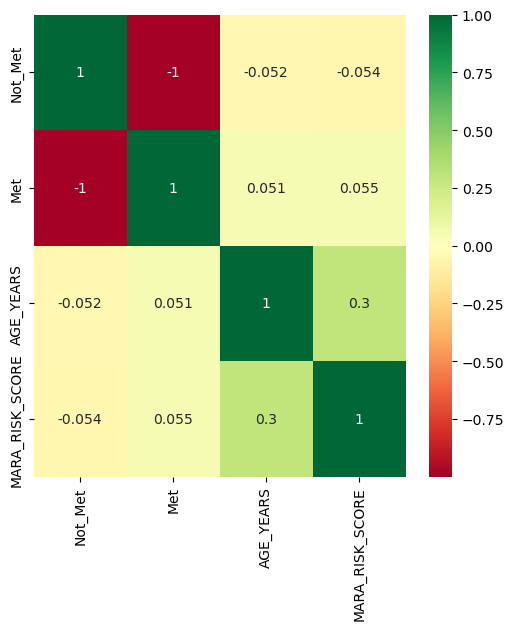

In [35]:
optional_correlation_heatmap = True
df = df_deidentified
if optional_correlation_heatmap:
    ql.pvlog('info',f'Optional Process {solution_name} Step 3  - Display a correlation matrix for all fields in the data frame.') 

    correlation_matrix = df.corr()     #establish a correlation matrix for all fields
    top_correlation_features = correlation_matrix.index
    plt.figure(figsize=(6,6))
    g=sns.heatmap(df[top_correlation_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
df_deidentified.to_excel("C:\\working_directory\\excel\\patient_measures_deidentified.xlsx")

In [33]:
df.columns


Index(['Network', 'Practice', 'PROVIDER_NAME', 'patient_id', 'Measure',
       'Not_Met', 'Met', 'AGE_YEARS', 'GENDER', 'MARA_RISK_SCORE',
       'PAYER_NAME', 'PLAN_NAME', 'age_group', 'risk_group'],
      dtype='object')

In [41]:
df.head(10)

,Network,Practice,PROVIDER_NAME,patient_id,Measure,Not_Met,Met,AGE_YEARS,GENDER,MARA_RISK_SCORE,PAYER_NAME,PLAN_NAME,age_group,risk_group
0,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_1,Tobacco Use Screening,0,1,28,Female,0.00,SELF PAY,SELF PAY,Adult,NaN
1,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_1,Adult Depression Screening,1,0,28,Female,0.00,SELF PAY,SELF PAY,Adult,NaN
2,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_1,Cervical Cancer Screening,0,1,28,Female,0.00,SELF PAY,SELF PAY,Adult,NaN
3,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,Patient_2,Tobacco Use Screening,0,1,48,Male,0.00,SELF PAY,TRADITIONAL,Adult,NaN
4,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,Patient_2,Adult Depression Screening,1,0,48,Male,0.00,SELF PAY,TRADITIONAL,Adult,NaN
5,General Physician PC,GPPC PCP Depew Transit,Stephanie LaPiana PA,Patient_2,Colorectal Cancer Screening,0,1,48,Male,0.00,SELF PAY,TRADITIONAL,Adult,NaN
6,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_3,Adult Depression Screening,1,0,36,NaN,0.00,IHA,United HC,Adult,NaN
7,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_3,Tobacco Use Screening,0,1,36,NaN,0.00,IHA,United HC,Adult,NaN
8,General Physician PC,GPPC PCP Depew Transit,Lauren Murray PA,Patient_3,Tobacco User Cessation Intervention,0,1,36,NaN,0.00,IHA,United HC,Adult,NaN
9,General Physician PC,GPPC PCP Depew Transit,William Kuehnling,Patient_4,Tobacco Use Screening,1,0,44,NaN,0.37,Fidelis,Medicaid TANF/SN:TANF Adult,Adult,Very Low Risk


## Optional Step 4 - Render descriptive statistics and profile every feature or Column of the Dataset

In [42]:
optional_descriptive_statistics = True

if optional_descriptive_statistics:
    ql.pvlog('info',f'Optional Process {solution_name} Step 4  - Display Descriptive statistics for the data frame.') 
    data_set_name = 'patient_measures'
    dd.display_descriptive_statistics(dd.get_descriptive_statistics(df,data_set_name))

Optional Process aihs_patient_measures Step 4  - Display Descriptive statistics for the data frame.


C:\Users\josep\anaconda3\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Outputting descriptive statistics profile to: C:\working_directory\html\patient_measuresdescriptive_statistics_profile.html


## Step 0 - Process End - display log

In [14]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  
ql.pvlog('info',f'Optional Process {solution_name} Step 0  - Process Complete - historical log appended.') 

2023-06-15 15:33:17,283 - INFO - START principal component analysis =============================================
2023-06-15 15:33:17,283 - INFO - START principal component analysis Start Time = 2023-06-15 15:33:17
2023-06-15 15:33:17,283 - INFO - principal component analysis Step 0 - Initialize the configuration file parser
2023-06-15 15:33:17,324 - INFO - Imported existing <module 'comtypes.gen' from 'C:\\Users\\josep\\anaconda3\\lib\\site-packages\\comtypes\\gen\\__init__.py'>
2023-06-15 15:33:17,324 - INFO - Using writeable comtypes cache directory: 'C:\Users\josep\anaconda3\lib\site-packages\comtypes\gen'
2023-06-15 15:33:23,323 - INFO - Process principal component analysis Step 0 - Initializing and starting Process.
2023-06-15 15:33:28,048 - INFO -  Step 1 - Load ANY data set for which to run principal components Analysis
2023-06-15 15:33:35,015 - INFO -  Step 1b - Loaded data set diabetes that contains 70692 rows and 18 columns.
2023-06-15 15:33:42,242 - INFO - Process principal